In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Clusterization without population size included

## Principal components

In [2]:
df = pd.read_csv('pca_without_pop.csv', index_col=0); df

,PC1,PC2,PC3,PC4,PC5
Denmark,-4.259093,-0.084716,0.130032,1.227324,-0.105004
New Zealand,-3.876772,0.002315,-0.214857,0.491164,-0.231022
Finland,-4.008061,0.075104,-0.069374,0.702838,-0.227648
Singapore,-2.418540,-0.972187,0.513881,0.439412,1.854850
Sweden,-4.261533,-0.039620,0.202593,0.844482,-0.371665
...,...,...,...,...,...
Sudan,3.361032,-0.702270,0.082010,0.500246,0.228665
Burundi,3.990765,-0.597979,-0.173760,0.901424,0.225418
Turkmenistan,2.748941,-1.219311,1.312042,0.169758,0.456655
Yemen,3.806265,-0.647156,0.205493,0.438826,0.468995


C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2 , the average silhouette_score is : 0.4474598131149864


C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3 , the average silhouette_score is : 0.3364915781247791


C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4 , the average silhouette_score is : 0.36685616811958954


C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 5 , the average silhouette_score is : 0.36407554959013694


C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 6 , the average silhouette_score is : 0.3466905967249507


C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 7 , the average silhouette_score is : 0.31725949592166097


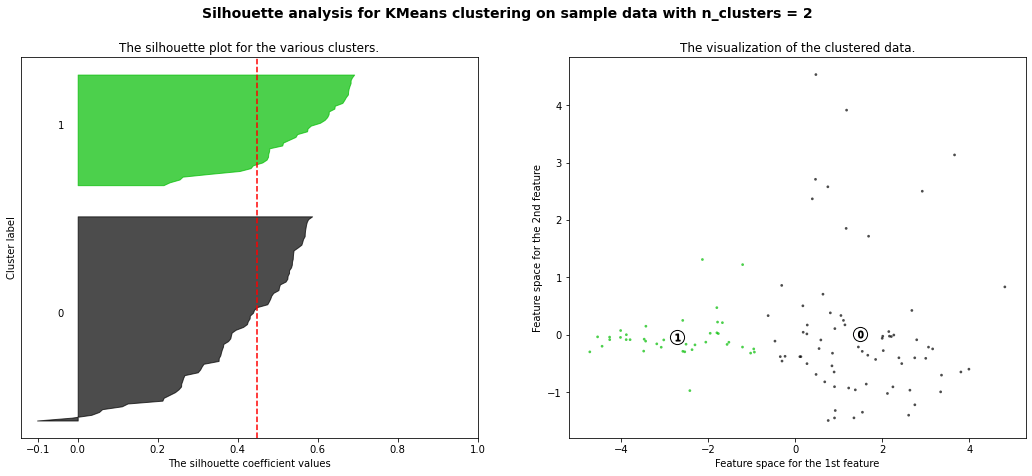

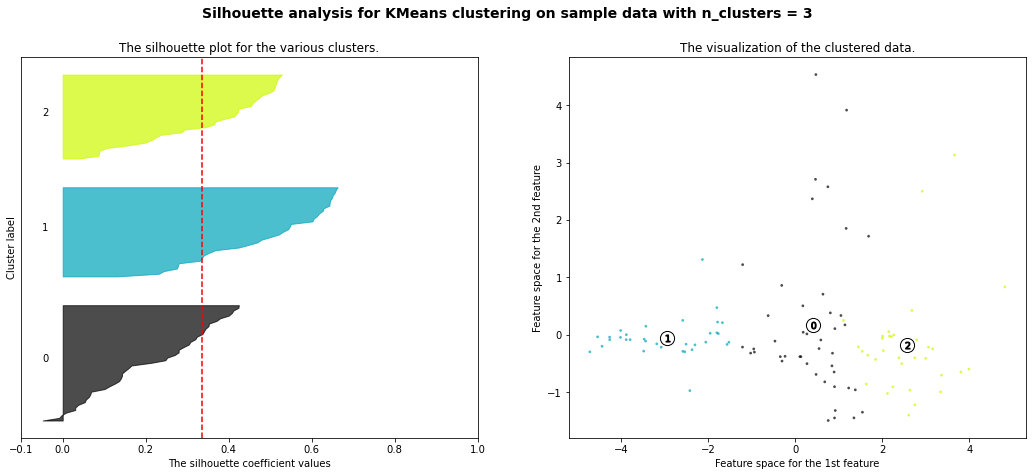

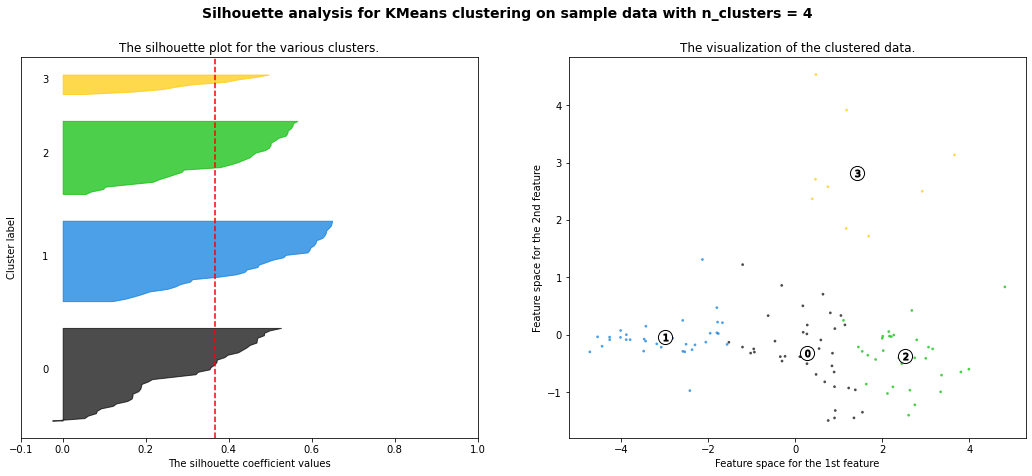

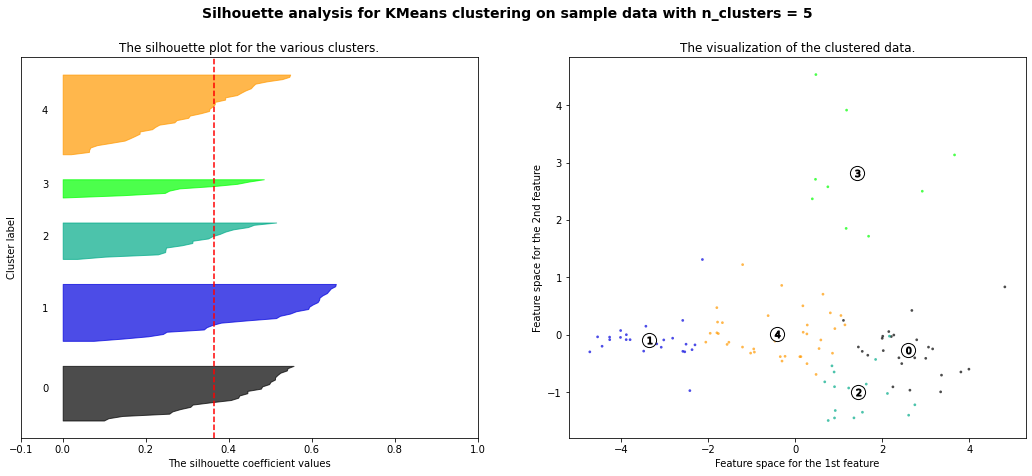

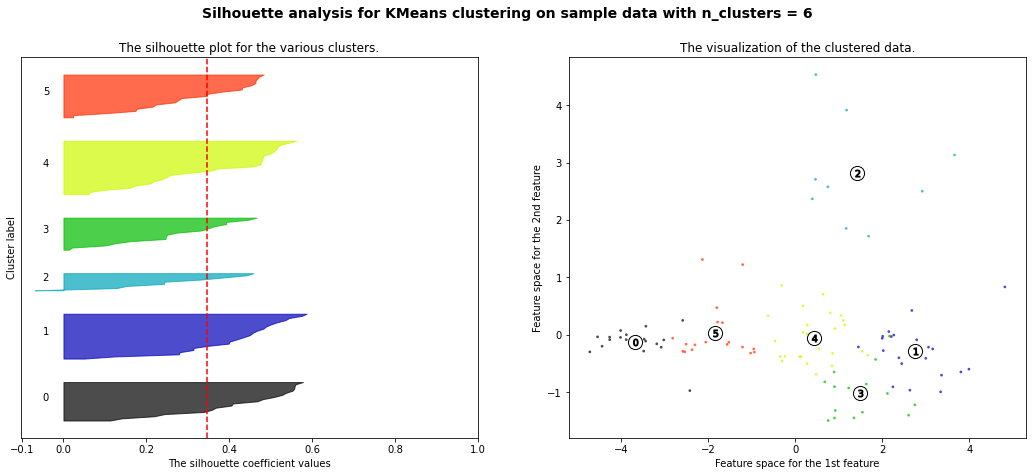

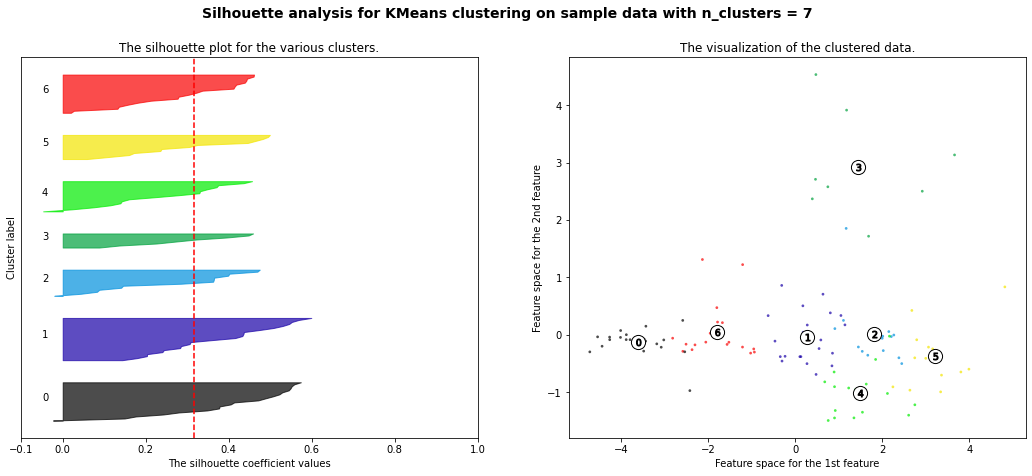

In [3]:
for n_clusters in range(2, 8):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    clusterer = KMeans(n_clusters=n_clusters, random_state=8)
    cluster_labels = clusterer.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        ", the average silhouette_score is :",
        silhouette_avg,
    )
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        df.PC1, df.PC2, marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",)


plt.show()    

The best results are achieved with two clusters, although a few items in cluster 0 seem to be misclassified.

## Original features

In [4]:
df = pd.read_csv('df.csv', index_col='country')
df.drop(columns='log_pop', inplace=True); df

,corruption,democracy,freedom,GDP_UN,HDI,homicide,life_expectancy,religion_important
country,,,,,,,,
Denmark,2.179303,1.542165,1.227743,2.062304,1.239562,-0.537611,0.934099,-2.037192
New Zealand,2.179303,1.589498,1.297354,1.260407,1.179606,-0.573944,1.129749,-1.478447
Finland,2.179303,1.565831,1.332159,1.476308,1.226239,-0.464943,1.073849,-1.677999
Singapore,2.024746,0.065386,-0.477729,1.908247,1.226239,-0.634501,1.311424,-0.001766
Sweden,2.024746,1.594231,1.332159,1.700317,1.272871,-0.525499,1.199624,-2.117012
...,...,...,...,...,...,...,...,...
Sudan,-1.323995,-1.586524,-1.556701,-0.689113,-1.625002,-0.041050,-1.246001,0.916171
Burundi,-1.375514,-1.775854,-1.661118,-0.740832,-2.137959,0.080063,-1.763076,1.115723
Turkmenistan,-1.375514,-1.974651,-2.078784,-0.428502,-0.259338,-0.150051,-0.840726,0.397337


C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2 , the average silhouette_score is : 0.4325702219006662


C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3 , the average silhouette_score is : 0.31883601493643676


C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4 , the average silhouette_score is : 0.34942713001874265


C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 5 , the average silhouette_score is : 0.30418194201296594


C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 6 , the average silhouette_score is : 0.3177799372939684


C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 7 , the average silhouette_score is : 0.2871637236127319


C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 8 , the average silhouette_score is : 0.3016890088455036


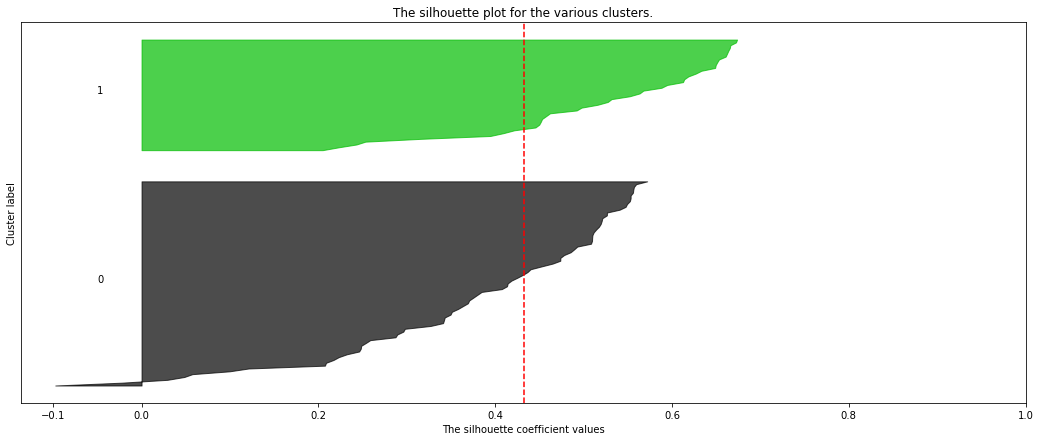

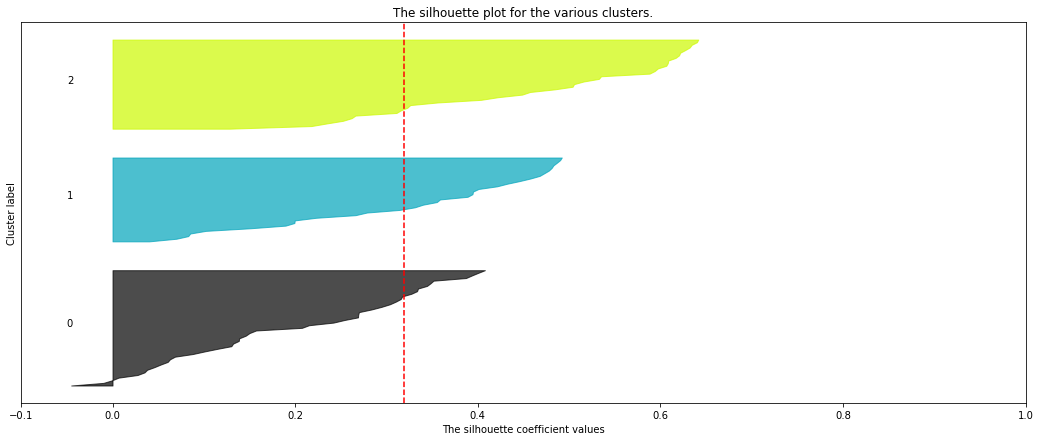

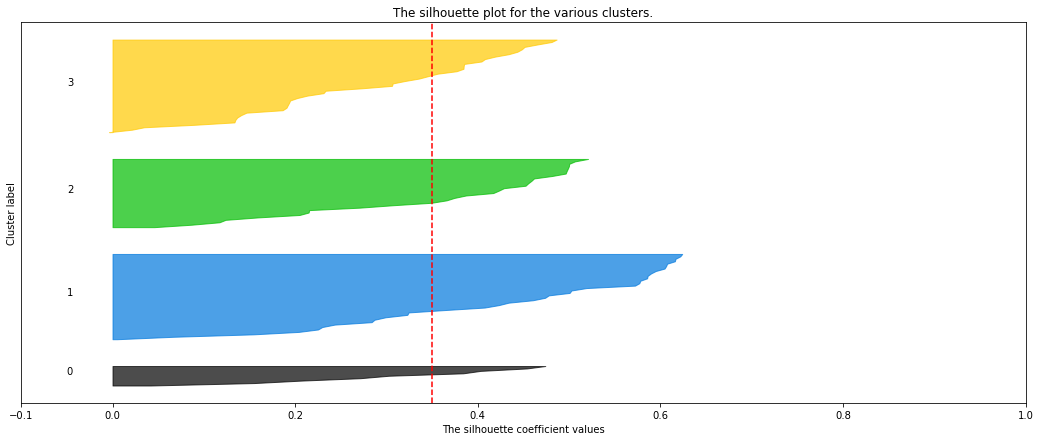

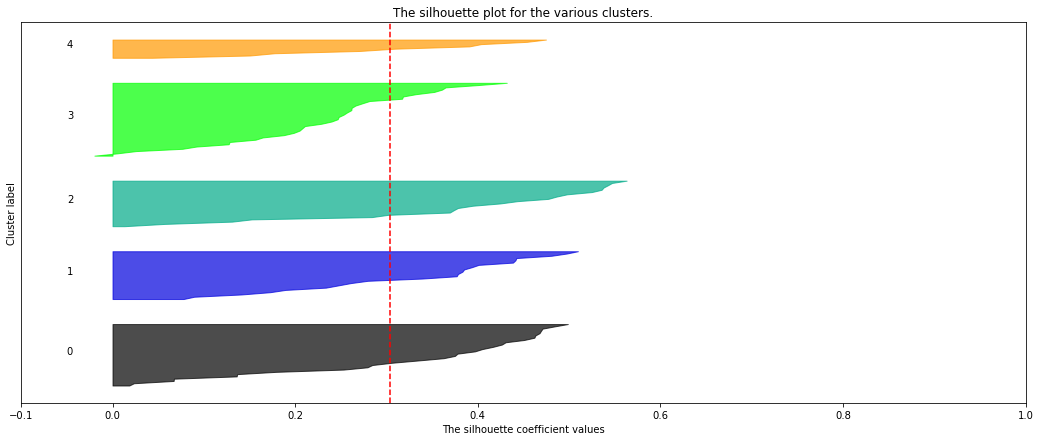

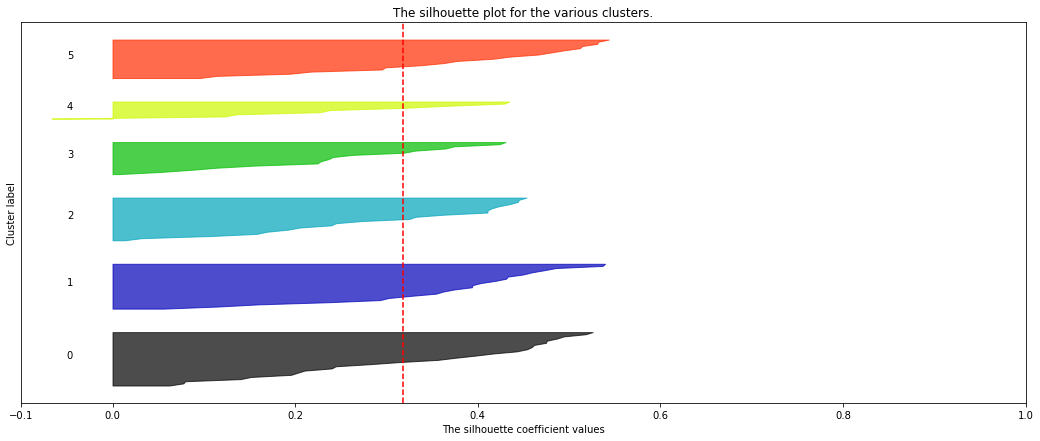

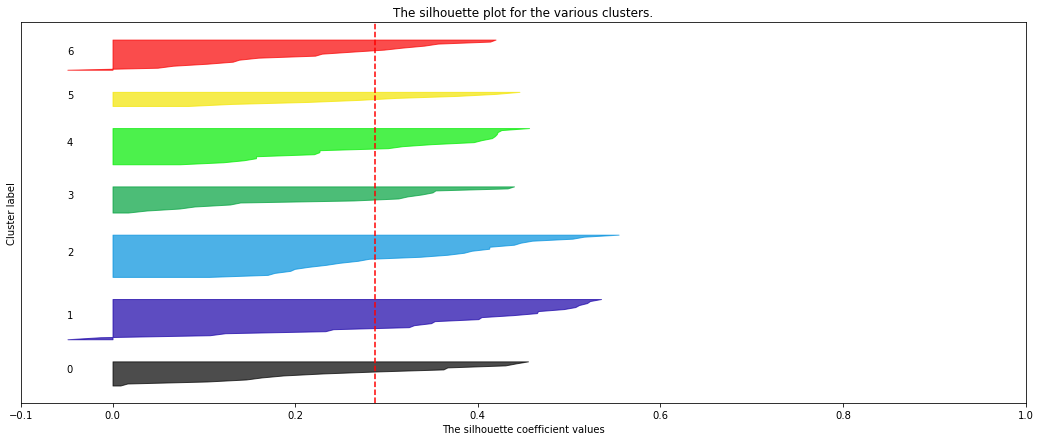

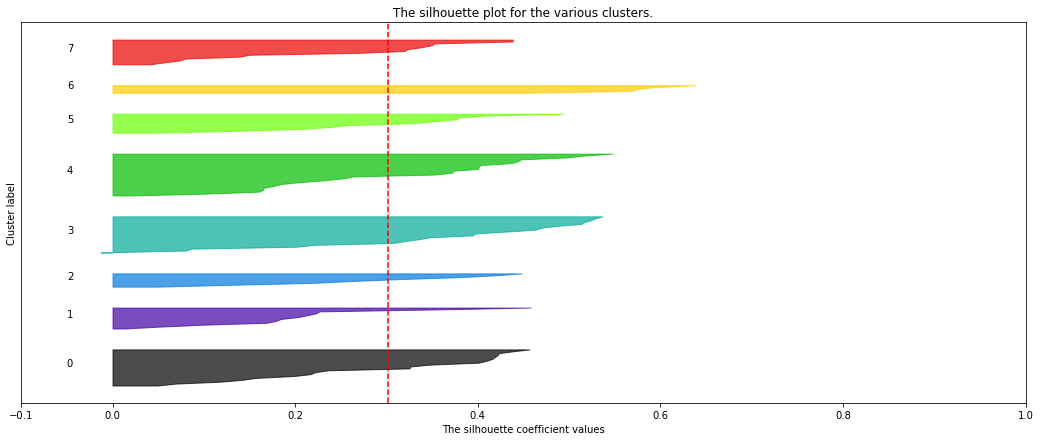

In [5]:
for n_clusters in range(2, 9):
    fig, ax = plt.subplots()
    fig.set_size_inches(18, 7)

    clusterer = KMeans(n_clusters=n_clusters, random_state=8)
    cluster_labels = clusterer.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        ", the average silhouette_score is :",
        silhouette_avg,
    )
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


plt.show()    

Silhouette score is better than the score with population inlcuded, with PCA yielding slightly better clustering again.

## Analysis of results for two clusters (after PCA)

In [6]:
df = pd.read_csv('pca_without_pop.csv', index_col=0); df

,PC1,PC2,PC3,PC4,PC5
Denmark,-4.259093,-0.084716,0.130032,1.227324,-0.105004
New Zealand,-3.876772,0.002315,-0.214857,0.491164,-0.231022
Finland,-4.008061,0.075104,-0.069374,0.702838,-0.227648
Singapore,-2.418540,-0.972187,0.513881,0.439412,1.854850
Sweden,-4.261533,-0.039620,0.202593,0.844482,-0.371665
...,...,...,...,...,...
Sudan,3.361032,-0.702270,0.082010,0.500246,0.228665
Burundi,3.990765,-0.597979,-0.173760,0.901424,0.225418
Turkmenistan,2.748941,-1.219311,1.312042,0.169758,0.456655
Yemen,3.806265,-0.647156,0.205493,0.438826,0.468995


In [7]:
n_clusters = 2
clusterer = KMeans(n_clusters, random_state=8)
cluster_labels = clusterer.fit_predict(df)

C:\Users\Denis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
sample_silhouette_values = silhouette_samples(df, cluster_labels)

In [9]:
df['cluster'] = cluster_labels
df['s'] = sample_silhouette_values
df

,PC1,PC2,PC3,PC4,PC5,cluster,s
Denmark,-4.259093,-0.084716,0.130032,1.227324,-0.105004,1,0.627134
New Zealand,-3.876772,0.002315,-0.214857,0.491164,-0.231022,1,0.675922
Finland,-4.008061,0.075104,-0.069374,0.702838,-0.227648,1,0.666138
Singapore,-2.418540,-0.972187,0.513881,0.439412,1.854850,1,0.437935
Sweden,-4.261533,-0.039620,0.202593,0.844482,-0.371665,1,0.642631
...,...,...,...,...,...,...,...
Sudan,3.361032,-0.702270,0.082010,0.500246,0.228665,0,0.559137
Burundi,3.990765,-0.597979,-0.173760,0.901424,0.225418,0,0.524706
Turkmenistan,2.748941,-1.219311,1.312042,0.169758,0.456655,0,0.505504
Yemen,3.806265,-0.647156,0.205493,0.438826,0.468995,0,0.538586


Add original features for analysis

In [10]:
df = df.join(pd.read_csv('df.csv', index_col='country'))
df.drop(columns='log_pop', inplace=True); df

,PC1,PC2,PC3,PC4,PC5,cluster,s,corruption,democracy,freedom,GDP_UN,HDI,homicide,life_expectancy,religion_important
Denmark,-4.259093,-0.084716,0.130032,1.227324,-0.105004,1,0.627134,2.179303,1.542165,1.227743,2.062304,1.239562,-0.537611,0.934099,-2.037192
New Zealand,-3.876772,0.002315,-0.214857,0.491164,-0.231022,1,0.675922,2.179303,1.589498,1.297354,1.260407,1.179606,-0.573944,1.129749,-1.478447
Finland,-4.008061,0.075104,-0.069374,0.702838,-0.227648,1,0.666138,2.179303,1.565831,1.332159,1.476308,1.226239,-0.464943,1.073849,-1.677999
Singapore,-2.418540,-0.972187,0.513881,0.439412,1.854850,1,0.437935,2.024746,0.065386,-0.477729,1.908247,1.226239,-0.634501,1.311424,-0.001766
Sweden,-4.261533,-0.039620,0.202593,0.844482,-0.371665,1,0.642631,2.024746,1.594231,1.332159,1.700317,1.272871,-0.525499,1.199624,-2.117012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sudan,3.361032,-0.702270,0.082010,0.500246,0.228665,0,0.559137,-1.323995,-1.586524,-1.556701,-0.689113,-1.625002,-0.041050,-1.246001,0.916171
Burundi,3.990765,-0.597979,-0.173760,0.901424,0.225418,0,0.524706,-1.375514,-1.775854,-1.661118,-0.740832,-2.137959,0.080063,-1.763076,1.115723
Turkmenistan,2.748941,-1.219311,1.312042,0.169758,0.456655,0,0.505504,-1.375514,-1.974651,-2.078784,-0.428502,-0.259338,-0.150051,-0.840726,0.397337
Yemen,3.806265,-0.647156,0.205493,0.438826,0.468995,0,0.538586,-1.530071,-1.865786,-1.765534,-0.711010,-1.891473,0.164842,-1.134201,1.155633


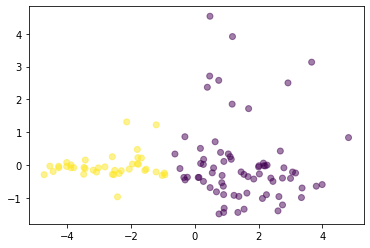

In [11]:
plt.scatter(df.PC1, y=df.PC2, c=df.cluster, alpha=0.5)
plt.show()

The divide is based on PC1, i.e. combined GDP per capita, life expectancy, corruption, etc. PC2 (mostly homicide) is less important.

# Conclusion

If we look at these features only, the modern world is a continuum rather then distinct groups of nations.